In [78]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
import string
import nltk
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import average_precision_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
import string
import nltk
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import average_precision_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score, cross_val_predict
from nltk.stem.porter import *
from nltk.corpus import stopwords
import numpy as np
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [79]:
reviews_df = pd.read_csv("Hotel_Reviews.csv")
reviews_df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


In [80]:
print("Duplicated rows before: ",reviews_df.duplicated().sum())
reviews_df.drop_duplicates(inplace=True)
print("Duplicated rows after: ",reviews_df.duplicated().sum())

Duplicated rows before:  526
Duplicated rows after:  0


In [81]:
reviews_df.dropna(inplace=True) #Remember to DELETE!!!
reviews_df.isna().sum() #Remember to DELETE!!!

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

In [82]:
print('No Positive values before:', end=" ")
print(reviews_df['Positive_Review'].value_counts().get('No Positive', 0))
print('No Negative values before:', end=" ")
print(reviews_df['Negative_Review'].value_counts().get('No Negative', 0))

reviews_df['Negative_Review']= reviews_df['Negative_Review'].replace("No Negative" , "")
reviews_df['Positive_Review']= reviews_df['Positive_Review'].replace("No Positive" , "")

reviews_df['Review'] = reviews_df['Negative_Review'].astype (str).str.cat (reviews_df['Positive_Review'], sep=' ')
reviews_df.head(5)

No Positive values before: 35695
No Negative values before: 126902


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No real complaints the hotel was great great...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...


In [83]:
!pip install plotly

In [84]:
def multiclassMap(x):
  if x<=7.5:
    return 0
  elif x<=8.5:
    return 1
  else:
    return 2

reviews_df3=reviews_df.copy()
reviews_df3["Hotel_Type"] = reviews_df3["Average_Score"].apply(multiclassMap)
reviews_df3.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review,Hotel_Type
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,1
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No real complaints the hotel was great great...,1
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...,1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...,1
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...,1


In [85]:
reviews_df3_Map1=reviews_df3.drop(reviews_df3[reviews_df3.Hotel_Type != 0].index)
reviews_df3_Map2=reviews_df3.drop(reviews_df3[reviews_df3.Hotel_Type != 1].index)
reviews_df3_Map3=reviews_df3.drop(reviews_df3[reviews_df3.Hotel_Type != 2].index)

In [86]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go

In [87]:
hotel_trace = go.Scattermapbox(
    lat=reviews_df3_Map1['lat'],
    lon=reviews_df3_Map1['lng'],
    mode='markers',
    marker=dict(
        size=7,
        color='red',
        opacity=1,
    ),
    text=reviews_df3_Map1[['Hotel_Name','Average_Score']],
    hoverinfo='text',
)

hotel_trace1 = go.Scattermapbox(
    lat=reviews_df3_Map2['lat'],
    lon=reviews_df3_Map2['lng'],
    mode='markers',
    marker=dict(
        size=7,
        color='yellow',
        opacity=1,
    ),
    text=reviews_df3_Map2[['Hotel_Name','Average_Score']],
    hoverinfo='text',
)

hotel_trace2 = go.Scattermapbox(
    lat=reviews_df3_Map3['lat'],
    lon=reviews_df3_Map3['lng'],
    mode='markers',
    marker=dict(
        size=7,
        color='green',
        opacity=1,
    ),
    text=reviews_df3_Map3[['Hotel_Name','Average_Score']],
    hoverinfo='text',
)

# Create a layout for the plot
layout = go.Layout(
    autosize=False,
    hovermode='closest',
    mapbox= dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
        center=dict(lat=48.8566, lon=2.3522),
        zoom=12,
    ),
    width=900, # set the width of the plot to 800 pixels
    height=600,title = "Drop off locations of hotels" # set the height of the plot to 600 pixels
)

# Create the figure and add the trace and layout
fig = go.Figure(data=[hotel_trace,hotel_trace1,hotel_trace2], layout=layout)

# Show the plot in a web browser
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [88]:
reviews_df_1 = reviews_df.loc[:, ['Hotel_Address','Hotel_Name','Review_Date','Reviewer_Nationality','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts','Total_Number_of_Reviews','Review','Reviewer_Score','lat','lng']]
reviews_df_1.head(5)

,Hotel_Address,Hotel_Name,Review_Date,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews,Review,Reviewer_Score,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,8/3/2017,Russia,397,11,1403,I am so angry that i made this post available...,2.9,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,8/3/2017,Ireland,0,105,1403,No real complaints the hotel was great great...,7.5,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/31/2017,Australia,42,21,1403,Rooms are nice but for elderly a bit difficul...,7.1,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/31/2017,United Kingdom,210,26,1403,My room was dirty and I was afraid to walk ba...,3.8,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/24/2017,New Zealand,140,8,1403,You When I booked with your company on line y...,6.7,52.360576,4.915968


In [89]:
fig = px.histogram(reviews_df_1, x="Reviewer_Score", title='Review Score Distribution', nbins=10, text_auto=True , color_discrete_sequence=['#F0CD53'], width=1000)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

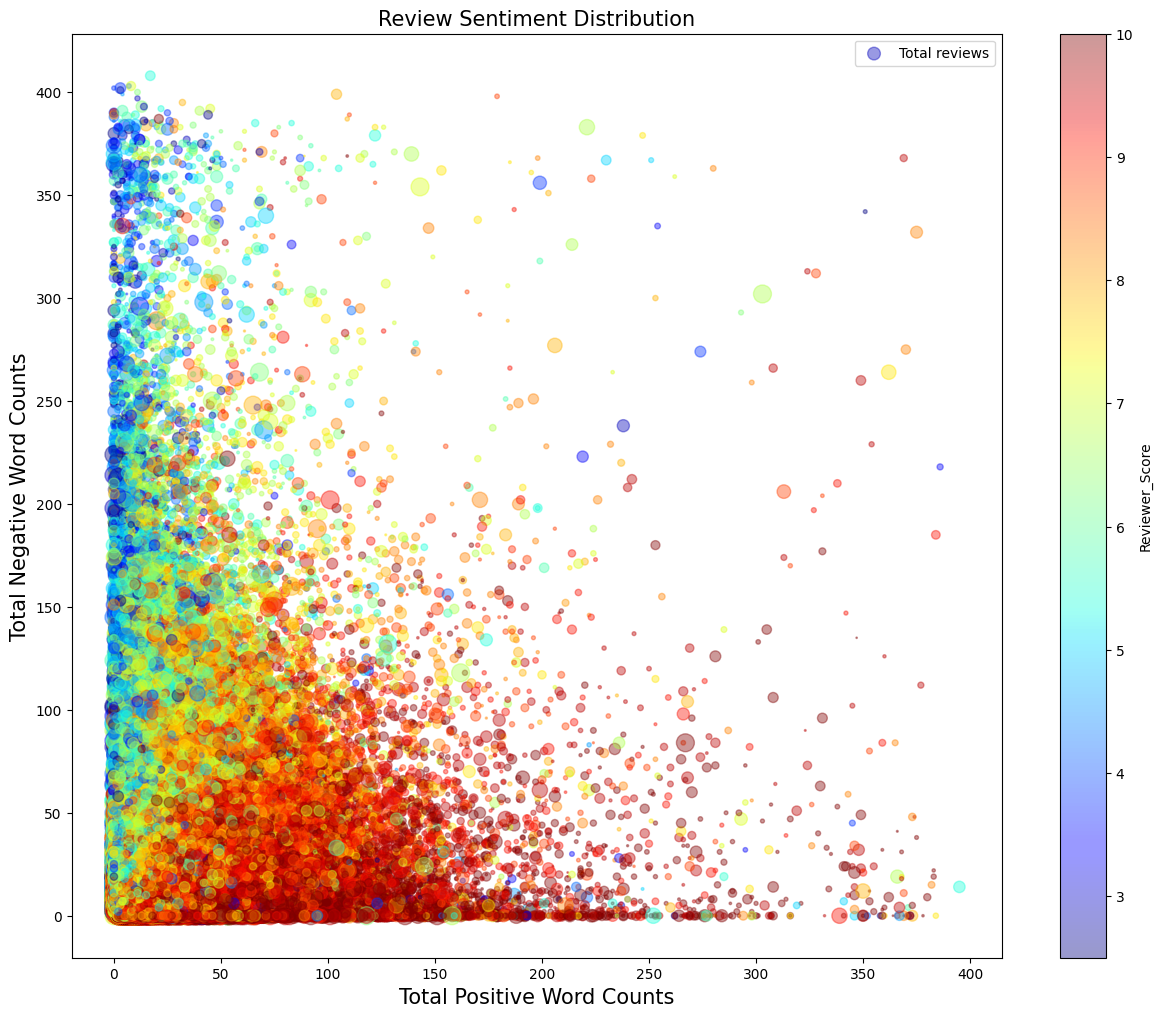

In [90]:
reviews_df_1.plot(kind='scatter',
                      x='Review_Total_Positive_Word_Counts',
                      y='Review_Total_Negative_Word_Counts',
                      label='Total reviews',
             s=reviews_df_1.Total_Number_of_Reviews/100,
             c='Reviewer_Score',
             cmap=plt.get_cmap('jet'),
             colorbar=True,
             alpha=0.4, figsize=(15,12),
             sharex=False)
font_size = 15
plt.title("Review Sentiment Distribution",  fontsize=font_size)
plt.xlabel("Total Positive Word Counts", fontsize=font_size)
plt.ylabel("Total Negative Word Counts",  fontsize=font_size)
plt.legend()
plt.show()

In [91]:
year = reviews_df_1['Review_Date'].map(lambda x: x.split('/')[2])
month = reviews_df_1['Review_Date'].map(lambda x: x.split('/')[0])
reviews_df_1['month'] = month
reviews_df_1['year'] = year

In [92]:
reviews_df_1

,Hotel_Address,Hotel_Name,Review_Date,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews,Review,Reviewer_Score,lat,lng,month,year
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,8/3/2017,Russia,397,11,1403,I am so angry that i made this post available...,2.9,52.360576,4.915968,8,2017
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,8/3/2017,Ireland,0,105,1403,No real complaints the hotel was great great...,7.5,52.360576,4.915968,8,2017
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/31/2017,Australia,42,21,1403,Rooms are nice but for elderly a bit difficul...,7.1,52.360576,4.915968,7,2017
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/31/2017,United Kingdom,210,26,1403,My room was dirty and I was afraid to walk ba...,3.8,52.360576,4.915968,7,2017
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/24/2017,New Zealand,140,8,1403,You When I booked with your company on line y...,6.7,52.360576,4.915968,7,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/30/2015,Kuwait,14,2,2823,no trolly or staff to help you take the lugga...,7.0,48.203745,16.335677,8,2015
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/22/2015,Estonia,11,11,2823,The hotel looks like 3 but surely not 4 Bre...,5.8,48.203745,16.335677,8,2015
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/19/2015,Egypt,19,0,2823,The ac was useless It was a hot week in vienn...,2.5,48.203745,16.335677,8,2015
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/17/2015,Mexico,0,25,2823,The rooms are enormous and really comfortabl...,8.8,48.203745,16.335677,8,2015


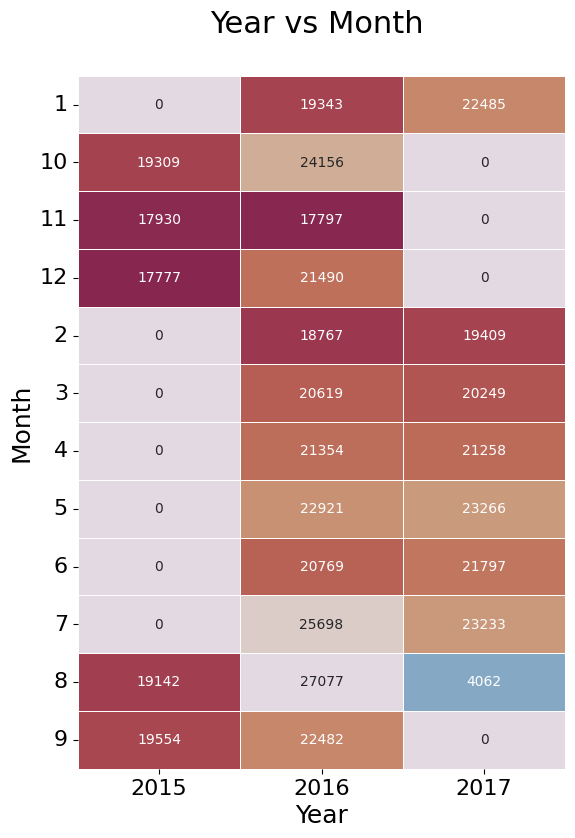

In [93]:
#Year vs Month
##Target_type vs Year
a=reviews_df_1.groupby(['year','month']).size()
a
b=a.unstack(level=0)
e=b.replace(np.nan,0)
e=e.astype(int)
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1.5])
ax0 = plt.subplot(gs[0])
sns.heatmap(e,annot=True,fmt='d',linewidths=.5,ax=ax0, cbar=False,annot_kws={"size":10},cmap='twilight')
plt.setp(ax0.yaxis.get_majorticklabels(),rotation=0)
ax0.tick_params(axis='y',labelsize=16)
ax0.tick_params(axis='x',labelsize=16)
ax0.set_ylabel("Month",size=18)
ax0.set_xlabel("Year",size=18)
ax0.set_title("Year vs Month ",size=22,y=1.05,x=0.5)

plt.show()

In [94]:
reviews2016_df = reviews_df_1.copy()
reviews2016_df

,Hotel_Address,Hotel_Name,Review_Date,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews,Review,Reviewer_Score,lat,lng,month,year
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,8/3/2017,Russia,397,11,1403,I am so angry that i made this post available...,2.9,52.360576,4.915968,8,2017
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,8/3/2017,Ireland,0,105,1403,No real complaints the hotel was great great...,7.5,52.360576,4.915968,8,2017
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/31/2017,Australia,42,21,1403,Rooms are nice but for elderly a bit difficul...,7.1,52.360576,4.915968,7,2017
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/31/2017,United Kingdom,210,26,1403,My room was dirty and I was afraid to walk ba...,3.8,52.360576,4.915968,7,2017
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/24/2017,New Zealand,140,8,1403,You When I booked with your company on line y...,6.7,52.360576,4.915968,7,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/30/2015,Kuwait,14,2,2823,no trolly or staff to help you take the lugga...,7.0,48.203745,16.335677,8,2015
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/22/2015,Estonia,11,11,2823,The hotel looks like 3 but surely not 4 Bre...,5.8,48.203745,16.335677,8,2015
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/19/2015,Egypt,19,0,2823,The ac was useless It was a hot week in vienn...,2.5,48.203745,16.335677,8,2015
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/17/2015,Mexico,0,25,2823,The rooms are enormous and really comfortabl...,8.8,48.203745,16.335677,8,2015


In [95]:
reviews2016_df.drop(reviews2016_df[reviews2016_df['year'] == '2015'].index, inplace=True)

In [96]:
reviews2016_df.drop(reviews2016_df[reviews2016_df['year'] == '2017'].index, inplace=True)

In [97]:
reviews2016_df

,Hotel_Address,Hotel_Name,Review_Date,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews,Review,Reviewer_Score,lat,lng,month,year
66,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,12/29/2016,United Kingdom,40,28,1403,Asked for more coffee and sugars only got giv...,9.2,52.360576,4.915968,12,2016
67,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,12/28/2016,South Africa,30,92,1403,Room was not cleaned correctly Wine Champagne...,7.5,52.360576,4.915968,12,2016
68,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,12/21/2016,United Arab Emirates,35,16,1403,The bathroom was amazing Though we were two f...,7.9,52.360576,4.915968,12,2016
69,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,12/20/2016,United Kingdom,46,47,1403,Our room didn t have a sofa in but these two ...,8.8,52.360576,4.915968,12,2016
70,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,12/19/2016,Germany,55,26,1403,The breakfast was rather average from quality...,6.7,52.360576,4.915968,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515714,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,4/14/2016,United Kingdom,16,14,2823,Staff not always at reception and had to wait...,9.6,48.203745,16.335677,4,2016
515715,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,3/30/2016,United Kingdom,8,9,2823,would have liked restaurant also serving dinn...,8.8,48.203745,16.335677,3,2016
515716,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,2/1/2016,Egypt,8,12,2823,Nothing was bad about the room Cleanliness ...,7.1,48.203745,16.335677,2,2016
515717,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,1/3/2016,Egypt,0,23,2823,Good breakfast Shooping center with supermAr...,7.9,48.203745,16.335677,1,2016


In [98]:
fig = px.histogram(reviews2016_df, x="month", title='2016 Month Distribution', nbins=5, text_auto=True , color='month', width=1000).update_xaxes(categoryorder='total ascending')
fig.show()

In [99]:
reviews_df_count = reviews_df_1.groupby('Hotel_Name').size().reset_index(name='count').sort_values(by='count', ascending=False)
fig = px.histogram(reviews_df_count.head(), x="Hotel_Name",y="count", title='Top 5 Hotels', text_auto=True , color='Hotel_Name', width=1000).update_xaxes(categoryorder='total descending')
fig.show()

In [100]:
def binaryclass(x):
  if x<7:
    return 0
  else:
    return 1


reviews_df_1["Review_Type_Binary"] = reviews_df_1["Reviewer_Score"].apply(binaryclass)
reviews_df_1.head(5)

,Hotel_Address,Hotel_Name,Review_Date,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews,Review,Reviewer_Score,lat,lng,month,year,Review_Type_Binary
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,8/3/2017,Russia,397,11,1403,I am so angry that i made this post available...,2.9,52.360576,4.915968,8,2017,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,8/3/2017,Ireland,0,105,1403,No real complaints the hotel was great great...,7.5,52.360576,4.915968,8,2017,1
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/31/2017,Australia,42,21,1403,Rooms are nice but for elderly a bit difficul...,7.1,52.360576,4.915968,7,2017,1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/31/2017,United Kingdom,210,26,1403,My room was dirty and I was afraid to walk ba...,3.8,52.360576,4.915968,7,2017,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/24/2017,New Zealand,140,8,1403,You When I booked with your company on line y...,6.7,52.360576,4.915968,7,2017,0


In [101]:
import plotly.graph_objects as go
def Top5ReviewsAnalysis(x):

  for index, row in x.iterrows():
    hotel_name = row['Hotel_Name']

    reviews_df_good = reviews_df_1.groupby(['Hotel_Name', 'Review_Type_Binary','year','month']).size().reset_index(name='count')
    reviews_df_good.drop(reviews_df_good[reviews_df_good.Review_Type_Binary == 0].index, inplace=True)
    reviews_df_good.drop(reviews_df_good[reviews_df_good.year != '2016'].index, inplace=True)
    reviews_df_good.drop(reviews_df_good[reviews_df_good.Hotel_Name != hotel_name].index, inplace=True)
    reviews_df_good['month'] = reviews_df_good['month'].astype(int)
    reviews_df_good = reviews_df_good.sort_values(by='month')

    reviews_df_bad = reviews_df_1.groupby(['Hotel_Name', 'Review_Type_Binary','year','month']).size().reset_index(name='count').sort_values(by='month', ascending=False)
    reviews_df_bad.drop(reviews_df_bad[reviews_df_bad.Review_Type_Binary == 1].index, inplace=True)
    reviews_df_bad.drop(reviews_df_bad[reviews_df_bad.year != '2016'].index, inplace=True)
    reviews_df_bad.drop(reviews_df_bad[reviews_df_bad.Hotel_Name != hotel_name].index, inplace=True)
    reviews_df_bad['month'] = reviews_df_bad['month'].astype(int)
    reviews_df_bad = reviews_df_bad.sort_values(by='month')

    reviews_df_all = reviews_df_1.groupby(['Hotel_Name','year','month']).size().reset_index(name='count')
    reviews_df_all.drop(reviews_df_all[reviews_df_all.year != '2016'].index, inplace=True)
    reviews_df_all.drop(reviews_df_all[reviews_df_all.Hotel_Name != hotel_name].index, inplace=True)
    reviews_df_all['month'] = reviews_df_all['month'].astype(int)
    reviews_df_all = reviews_df_all.sort_values(by='month')

    print(hotel_name)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=reviews_df_good['month'], y=reviews_df_good['count'], name="Good Reviews",line=dict(width=5)))
    fig.add_trace(go.Scatter(x=reviews_df_bad['month'], y=reviews_df_bad['count'], name="Bad Reviews",line=dict(width=5)))
    fig.add_trace(go.Scatter(x=reviews_df_all['month'], y=reviews_df_all['count'], name="Reviews Count",line=dict(width=5)))
    fig.update_layout( xaxis = dict( tickmode = 'linear', tick0 = 0, dtick = 1 ) )
    fig.update_xaxes(categoryorder='category ascending') #Try to fix! :C
    fig.show()

Top5ReviewsAnalysis( reviews_df_count.head() )

Britannia International Hotel Canary Wharf


Strand Palace Hotel


Park Plaza Westminster Bridge London


Copthorne Tara Hotel London Kensington


DoubleTree by Hilton Hotel London Tower of London


In [102]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [103]:
stop_words = stopwords.words('english')
#reviews_df_wordcloud = reviews_df_1['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
reviews_df_wordcloud = reviews_df_1.assign (Review_Cleaned = lambda x: x['Review'].apply(lambda y: ' '.join([word for word in y.split() if word not in (stop_words)])))
reviews_df_wordcloud

,Hotel_Address,Hotel_Name,Review_Date,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews,Review,Reviewer_Score,lat,lng,month,year,Review_Type_Binary,Review_Cleaned
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,8/3/2017,Russia,397,11,1403,I am so angry that i made this post available...,2.9,52.360576,4.915968,8,2017,0,I angry made post available via possible sites...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,8/3/2017,Ireland,0,105,1403,No real complaints the hotel was great great...,7.5,52.360576,4.915968,8,2017,1,No real complaints hotel great great location ...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/31/2017,Australia,42,21,1403,Rooms are nice but for elderly a bit difficul...,7.1,52.360576,4.915968,7,2017,1,Rooms nice elderly bit difficult rooms two sto...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/31/2017,United Kingdom,210,26,1403,My room was dirty and I was afraid to walk ba...,3.8,52.360576,4.915968,7,2017,0,My room dirty I afraid walk barefoot floor loo...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/24/2017,New Zealand,140,8,1403,You When I booked with your company on line y...,6.7,52.360576,4.915968,7,2017,0,You When I booked company line showed pictures...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/30/2015,Kuwait,14,2,2823,no trolly or staff to help you take the lugga...,7.0,48.203745,16.335677,8,2015,1,trolly staff help take luggage room location
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/22/2015,Estonia,11,11,2823,The hotel looks like 3 but surely not 4 Bre...,5.8,48.203745,16.335677,8,2015,0,The hotel looks like 3 surely 4 Breakfast ok g...
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/19/2015,Egypt,19,0,2823,The ac was useless It was a hot week in vienn...,2.5,48.203745,16.335677,8,2015,0,The ac useless It hot week vienna gave hot air
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,Atlantis Hotel Vienna,8/17/2015,Mexico,0,25,2823,The rooms are enormous and really comfortabl...,8.8,48.203745,16.335677,8,2015,1,The rooms enormous really comfortable I believ...


In [104]:
def binaryclass(x):
  if x<4.5:
    return 0
  elif x>8:
    return 1
  else:
    return 2


reviews_df_wordcloud["Review_Type_Binary"] = reviews_df_wordcloud["Reviewer_Score"].apply(binaryclass)
reviews_df_wordcloud.drop(reviews_df_1[reviews_df_wordcloud.Review_Type_Binary == 2].index, inplace=True)
reviews_df_wordcloud.head(5)

,Hotel_Address,Hotel_Name,Review_Date,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews,Review,Reviewer_Score,lat,lng,month,year,Review_Type_Binary,Review_Cleaned
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,8/3/2017,Russia,397,11,1403,I am so angry that i made this post available...,2.9,52.360576,4.915968,8,2017,0,I angry made post available via possible sites...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/31/2017,United Kingdom,210,26,1403,My room was dirty and I was afraid to walk ba...,3.8,52.360576,4.915968,7,2017,0,My room dirty I afraid walk barefoot floor loo...
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/17/2017,United Kingdom,11,19,1403,Apart from the price for the brekfast Everyth...,10.0,52.360576,4.915968,7,2017,1,Apart price brekfast Everything good Good loca...
10,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/7/2017,United Kingdom,5,101,1403,Nothing all great Rooms were stunningly dec...,10.0,52.360576,4.915968,7,2017,1,Nothing great Rooms stunningly decorated reall...
13,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,7/4/2017,Italy,0,59,1403,This hotel is being renovated with great car...,9.2,52.360576,4.915968,7,2017,1,This hotel renovated great care appreciation u...


In [72]:
def Top5Wordcloud(x):

    reviews_df_wordcloudgood = reviews_df_wordcloud.copy()
    reviews_df_wordcloudgood.drop(reviews_df_wordcloudgood[reviews_df_wordcloudgood.Review_Type_Binary != 1].index, inplace=True)

    reviews_df_wordcloudbad = reviews_df_wordcloud.copy()
    reviews_df_wordcloudbad.drop(reviews_df_wordcloudbad[reviews_df_wordcloudbad.Review_Type_Binary != 0].index, inplace=True)

    #reviews_df_wordcloudall = reviews_df_wordcloud.copy()
    #textall = " ".join(reviews_df_wordcloudall["Review"])
    #wc = WordCloud().generate(textall)
    # Ottengo il dizionario delle parole e delle frequenze
    #words = wc.words_
    #print(words)


    top_words = ['room','hotel','staff']
    stopwords2 = WordCloud().stopwords
    stopwords2.update(top_words)

    textgood = " ".join(reviews_df_wordcloudgood["Review"])
    wordcloudgood = WordCloud(width=800, height=400,max_words=50,background_color="white", max_font_size=300 , stopwords=stopwords2).generate(textgood)
    fig = px.imshow(wordcloudgood, title="Word Cloud of Positive Reviews")
    fig.show()


    textbad = " ".join(reviews_df_wordcloudbad["Review"])
    wordcloudbad = WordCloud(width=800, height=400,max_words=50,background_color="white", max_font_size=300, stopwords=stopwords2).generate(textbad)
    fig = px.imshow(wordcloudbad, title="Word Cloud of Negative Reviews")
    fig.show()

Top5Wordcloud( reviews_df_count.head() )

In [73]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
  text = text.lower()
  text = [word.strip(string.punctuation) for word in text.split(" ")]
  text = [word for word in text if not any(c.isdigit() for c in word)]
  stop = stopwords.words('english')
  text = [x for x in text if x not in stop]
  text = [t for t in text if len(t) > 0]
  pos_tags = pos_tag(text)
  text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
  text = [t for t in text if len(t) > 1]
  text = " ".join(text)
  return(text)

Britannia International Hotel Canary Wharf


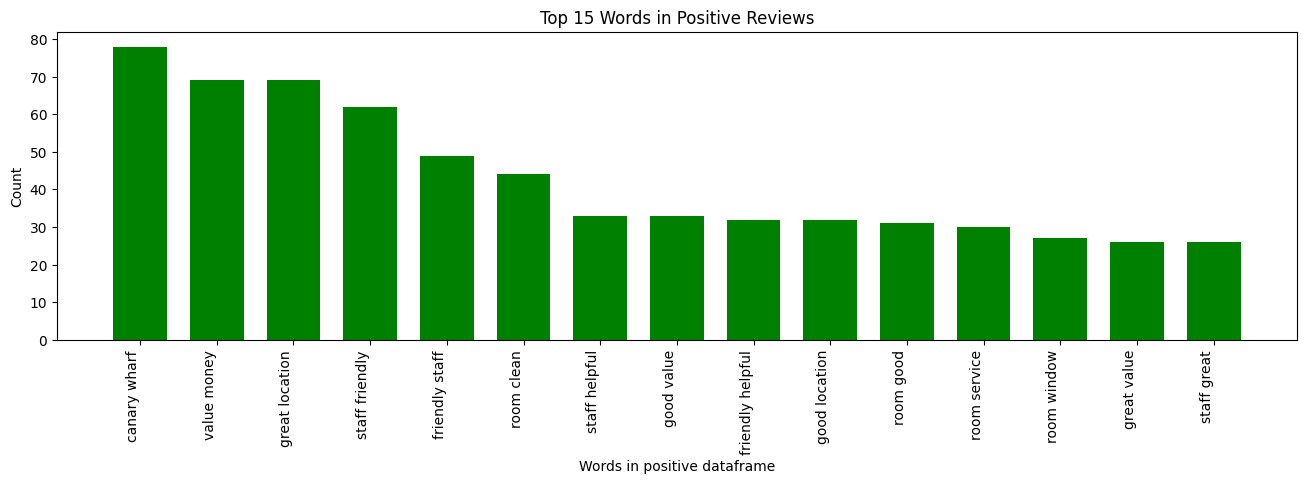

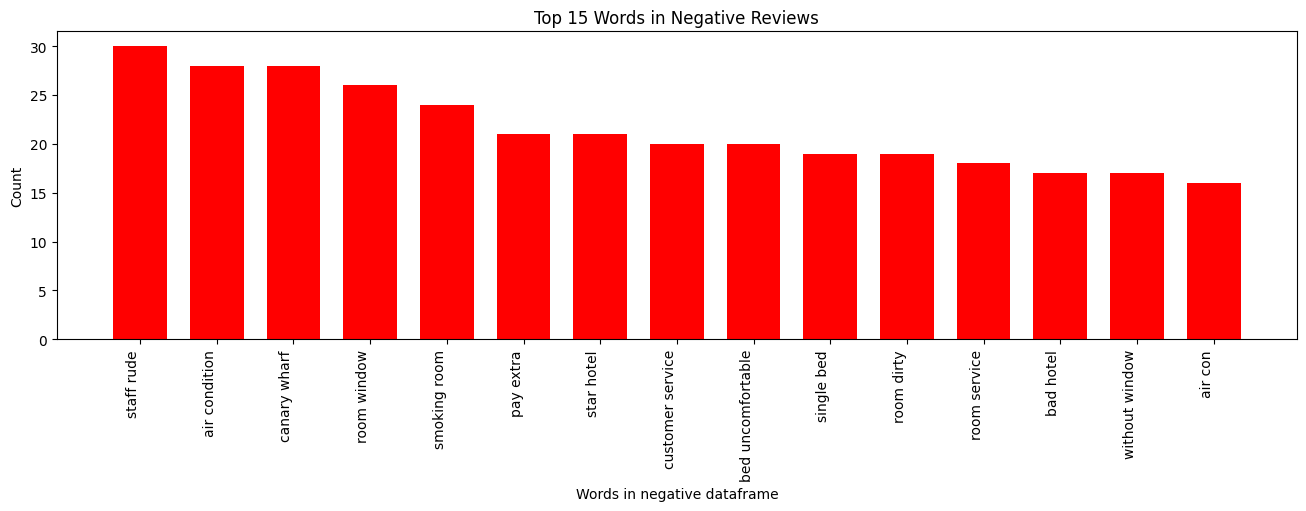

Strand Palace Hotel


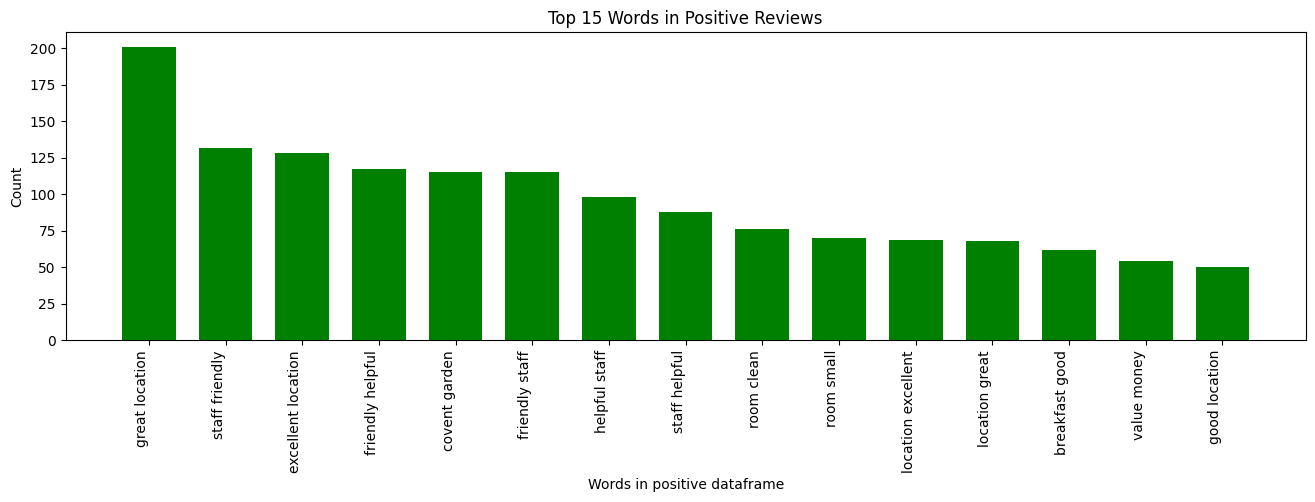

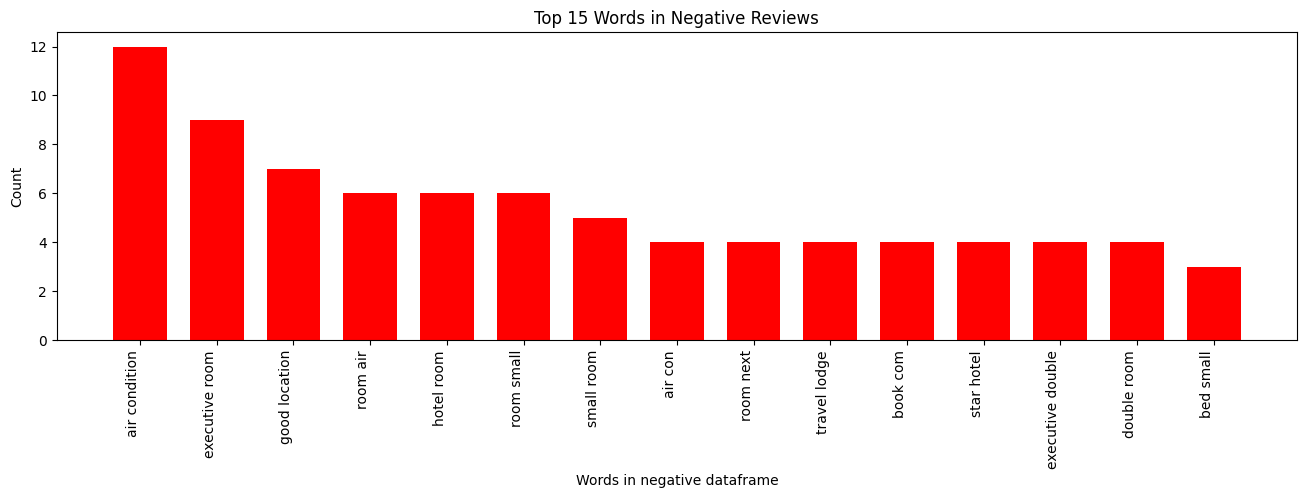

Park Plaza Westminster Bridge London


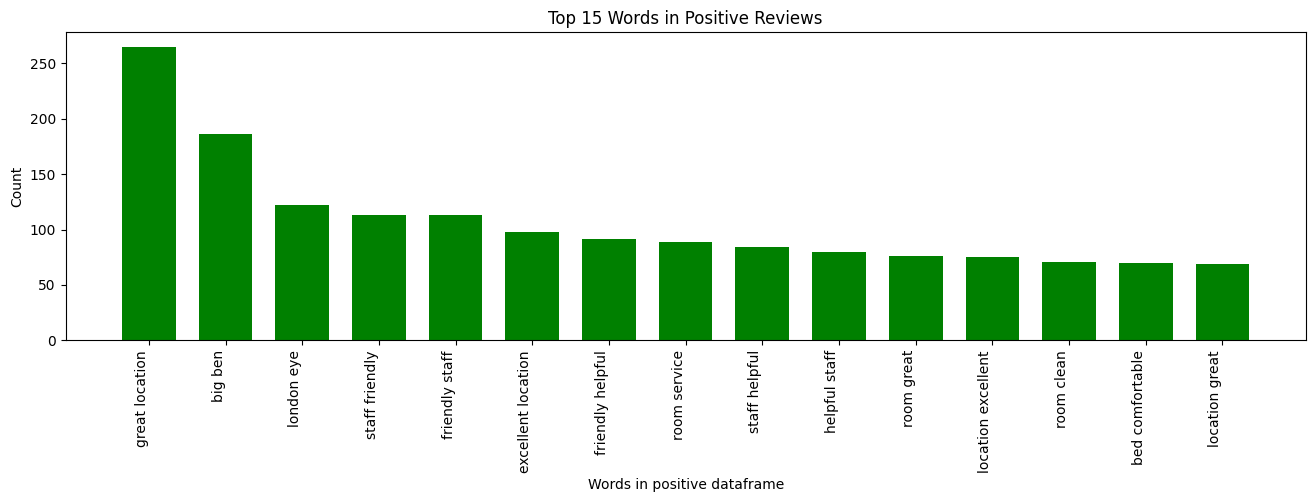

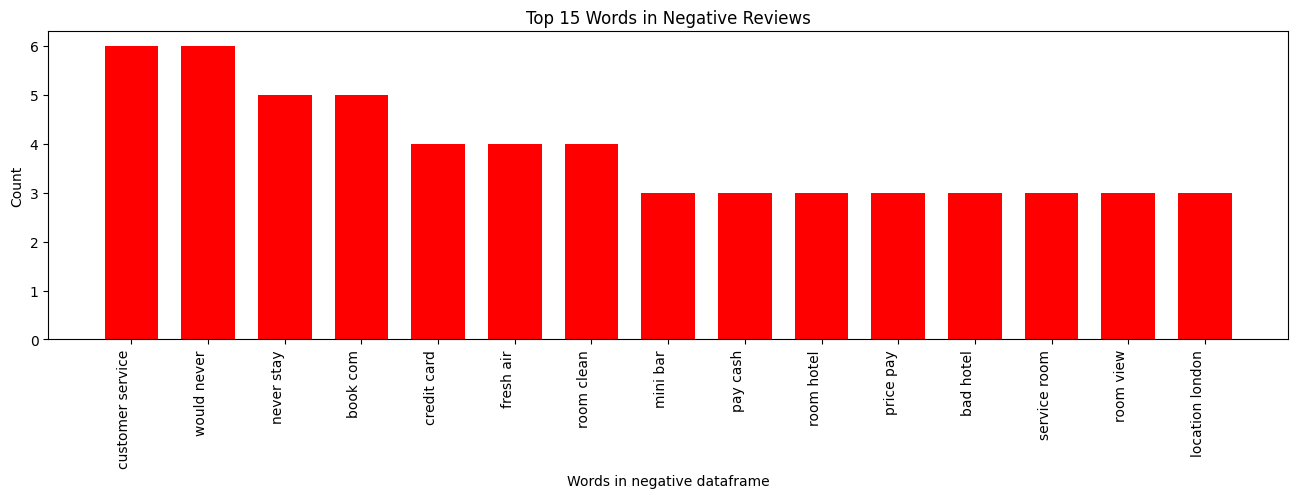

Copthorne Tara Hotel London Kensington


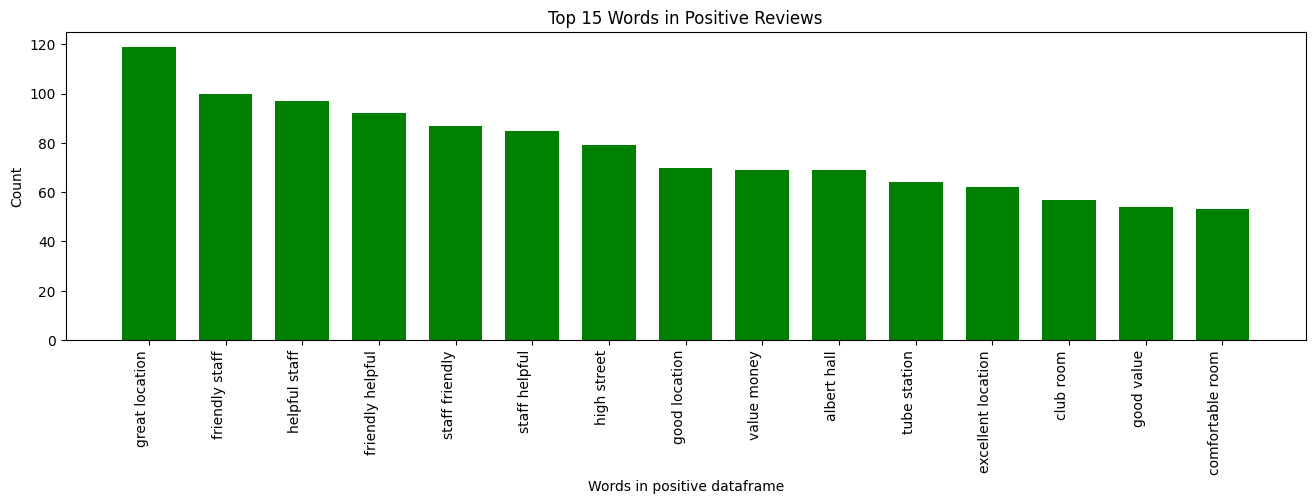

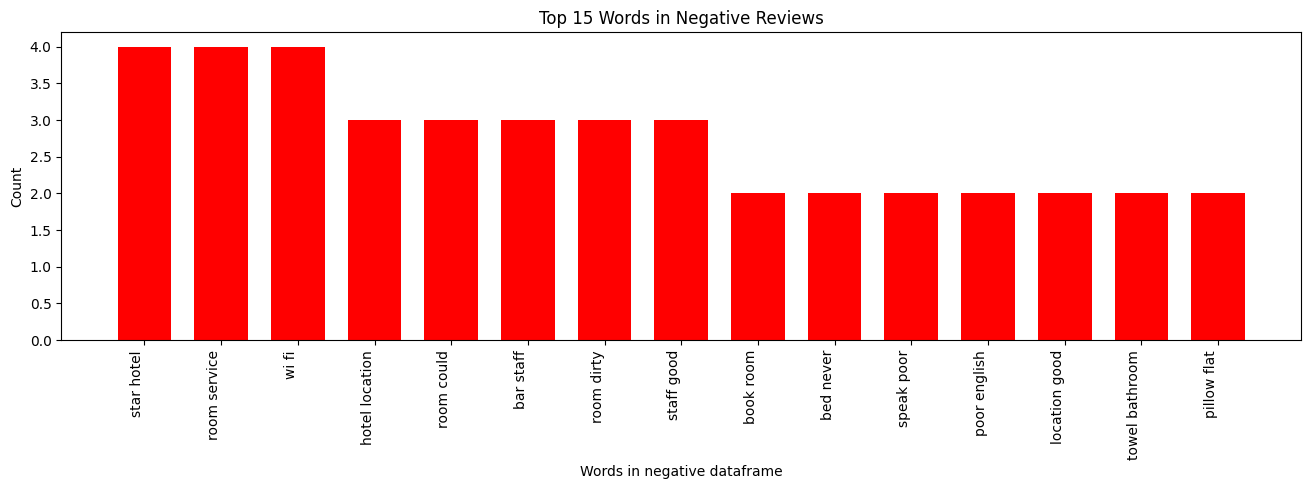

DoubleTree by Hilton Hotel London Tower of London


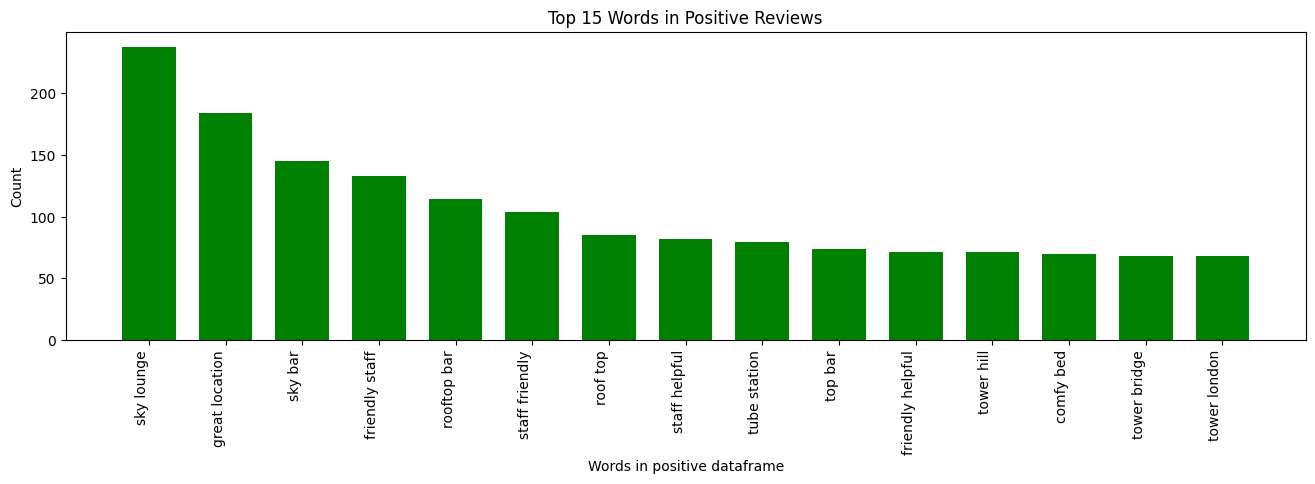

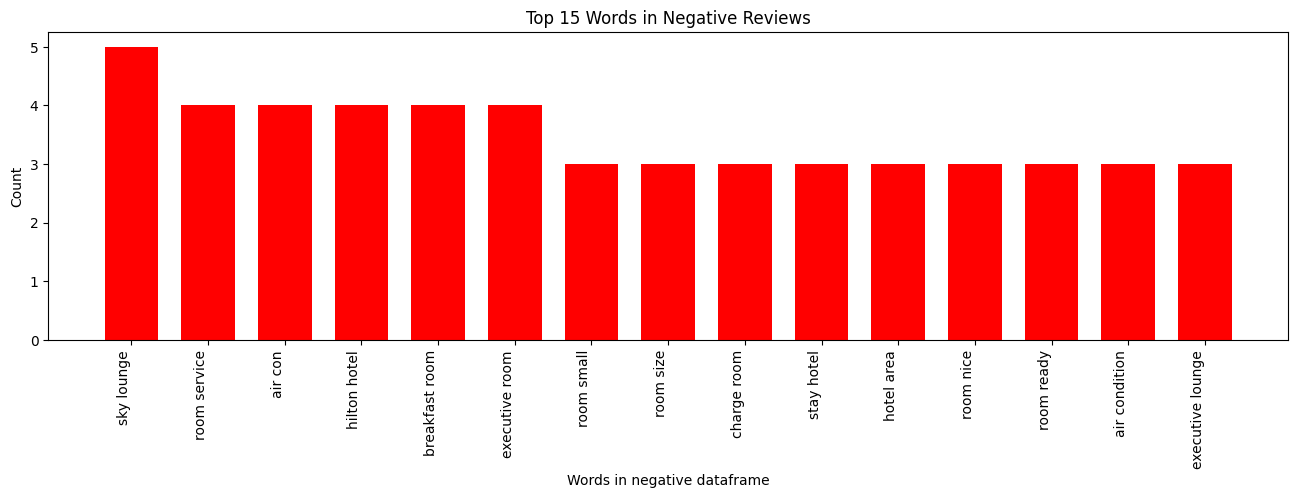

In [74]:
from numpy.ma.core import negative
#for text in df_train[.Review_Type_Binary=="1"].news:
##  for word in generate_N_grams(text,2):
#    positiveValues2[word]+=1


from nltk import ngrams
import plotly.graph_objects as go
from collections import defaultdict

def generate_N_grams(text,ngram=1):
  text = clean_text(text)
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

def abc(x):

  for index, row in x.iterrows():
    hotel_name = row['Hotel_Name']

    reviews_df_good = reviews_df_wordcloud.copy()
    reviews_df_good.drop(reviews_df_good[reviews_df_good.Review_Type_Binary == 0].index, inplace=True)
    reviews_df_good.drop(reviews_df_good[reviews_df_good.Hotel_Name != hotel_name].index, inplace=True)

    reviews_df_bad = reviews_df_wordcloud.copy()
    reviews_df_bad.drop(reviews_df_bad[reviews_df_bad.Review_Type_Binary == 1].index, inplace=True)
    reviews_df_bad.drop(reviews_df_bad[reviews_df_bad.Hotel_Name != hotel_name].index, inplace=True)

    print(hotel_name)

    positiveValues=defaultdict(int)
    for text in reviews_df_good['Review_Cleaned']:
      for word in generate_N_grams(text,2):
          positiveValues[word]+=1


    negativeValues=defaultdict(int)
    for text in reviews_df_bad['Review_Cleaned']:
      for word in generate_N_grams(text,2):
          negativeValues[word]+=1

    df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
    df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))

    pd1bi=df_positive[0][:15]
    pd2bi=df_positive[1][:15]

    ned1bi=df_negative[0][:15]
    ned2bi=df_negative[1][:15]

    plt.figure(1,figsize=(16,4))
    plt.bar(pd1bi,pd2bi, color ='green',width = 0.7)
    plt.ylabel("Count")
    plt.title("Top 15 Words in Positive Reviews")
    plt.xticks(rotation=90, ha='right')
    plt.show()

    plt.figure(1,figsize=(16,4))
    plt.bar(ned1bi,ned2bi, color ='red',width = 0.7)
    plt.ylabel("Count")
    plt.title("Top 15 Words in Negative Reviews")
    plt.xticks(rotation=90, ha='right')
    plt.show()

abc( reviews_df_count.head() )

In [75]:
def multiclass(x):
  if x<=3.5:
    return 0
  elif (x<=6.5 and x>=5.5):
    return 1
  elif x==10:
    return 2
  else:
    return 3

reviews_df2=reviews_df.copy()
reviews_df2["Review_Type"] = reviews_df2["Reviewer_Score"].apply(multiclass)
reviews_df2.drop(reviews_df2[reviews_df2.Review_Type == 3].index, inplace=True)
reviews_df2.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review,Review_Type
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,0
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968,Apart from the price for the brekfast Everyth...,2
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968,Even though the pictures show very clean room...,1
10,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/7/2017,7.7,Hotel Arena,United Kingdom,Nothing all great,5,1403,Rooms were stunningly decorated and really sp...,101,2,10.0,"[' Leisure trip ', ' Group ', ' Duplex Double ...",27 days,52.360576,4.915968,Nothing all great Rooms were stunningly dec...,2
11,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/6/2017,7.7,Hotel Arena,France,6 30 AM started big noise workers loading woo...,75,1403,Style location rooms,4,12,5.8,"[' Business trip ', ' Solo traveler ', ' Duple...",28 days,52.360576,4.915968,6 30 AM started big noise workers loading woo...,1


In [76]:
reviewsplot_df = reviews_df2['Review_Type'].astype(int)
reviewsplot_df = reviewsplot_df.to_frame(name='Review_Type')

In [77]:
fig = px.histogram(reviewsplot_df, x="Review_Type", title='Review Score Distribution', nbins=5, text_auto=True ,color="Review_Type", width=1000)
fig.show()